In [150]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import *

In [18]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

tickers = pd.read_csv("omx_tickers.csv", header=None) # as of 2021-03-01
tickers = list(tickers[0])
for i in range(len(tickers)):
    tickers[i] = tickers[i].replace(" ", "-") + ".ST"
print(len(tickers), tickers)

386 ['8TRA.ST', 'AAK.ST', 'ABB.ST', 'ADDT-B.ST', 'AF-B.ST', 'ALFA.ST', 'ALIV-SDB.ST', 'AM1S.ST', 'ARION-SDB.ST', 'ARJO-B.ST', 'ASSA-B.ST', 'ATCO-A.ST', 'ATCO-B.ST', 'ATRLJ-B.ST', 'AXFO.ST', 'AZA.ST', 'AZN.ST', 'BALD-B.ST', 'BEIJ-B.ST', 'BETS-B.ST', 'BHG.ST', 'BILL.ST', 'BOL.ST', 'BRAV.ST', 'BURE.ST', 'CAST.ST', 'CATE.ST', 'CINT.ST', 'DOM.ST', 'EKTA-B.ST', 'ELUX-A.ST', 'ELUX-B.ST', 'EPI-A.ST', 'EPI-B.ST', 'EPRO-B.ST', 'EQT.ST', 'ERIC-A.ST', 'ERIC-B.ST', 'ESSITY-A.ST', 'ESSITY-B.ST', 'EVO.ST', 'FABG.ST', 'FOI-B.ST', 'FPAR-A.ST', 'FPAR-D.ST', 'FPAR-PREF.ST', 'GETI-B.ST', 'HEXA-B.ST', 'HM-B.ST', 'HOLM-A.ST', 'HOLM-B.ST', 'HPOL-B.ST', 'HUFV-A.ST', 'HUSQ-A.ST', 'HUSQ-B.ST', 'ICA.ST', 'INDT.ST', 'INDU-A.ST', 'INDU-C.ST', 'INTRUM.ST', 'INVE-A.ST', 'INVE-B.ST', 'JM.ST', 'KIND-SDB.ST', 'KINV-A.ST', 'KINV-B.ST', 'KLED.ST', 'KLOV-A.ST', 'KLOV-B.ST', 'KLOV-PREF.ST', 'LATO-B.ST', 'LIFCO-B.ST', 'LOOMIS.ST', 'LUMI.ST', 'LUND-B.ST', 'LUNE.ST', 'MCOV-B.ST', 'MYCR.ST', 'NCC-A.ST', 'NCC-B.ST', 'NDA-SE.ST'

In [206]:
OMX_raw = web.DataReader(tickers[2:5], 'yahoo', start, end)

In [220]:
OMX = OMX_raw.copy()
OMX["Open"] = OMX["Open"] * OMX["Adj Close"] / OMX["Close"]
OMX.rename(columns={"Open":"Adj Open"}, inplace=True)
OMX["High"] = OMX["High"] * OMX["Adj Close"] / OMX["Close"]
OMX.rename(columns={"High":"Adj High"}, inplace=True)
OMX["Low"] = OMX["Low"] * OMX["Adj Close"] / OMX["Close"]
OMX.rename(columns={"Low":"Adj Low"}, inplace=True)
OMX = OMX[["Adj Open", "Adj High", "Adj Low", "Adj Close", "Volume"]]
OMX = OMX.fillna(0)
OMX

Attributes    Adj Open                            Adj High              \
Symbols         ABB.ST   ADDT-B.ST     AF-B.ST      ABB.ST   ADDT-B.ST   
Date                                                                     
2010-01-04  130.921960    6.182264   31.319710  131.300903    6.265247   
2010-01-05  131.395623    6.279078   31.720215  132.248235    6.348232   
2010-01-07  133.574485    6.348231   31.560008  135.848087    6.417384   
2010-01-08  135.942853    6.528029   31.079397  137.932266    6.528029   
2010-01-11  138.974312    6.555690   30.598795  139.447980    6.555690   
...                ...         ...         ...         ...         ...   
2021-02-23  247.000000  122.000000  223.199997  247.399994  122.000000   
2021-02-24  241.100006  120.000000  222.800003  245.199997  122.000000   
2021-02-25  246.000000  121.000000  226.000000  246.800003  126.000000   
2021-02-26  242.600006  122.000000  227.800003  244.699997  123.000000   
2021-03-01  243.800003  124.000000  230.600006  247.100006  126.000000   

Attributes                 Adj Low                           Adj Close  \
Symbols        AF-B.ST      ABB.ST   ADDT-B.ST     AF-B.ST      ABB.ST   
Date                                                                     
2010-01-04   31.960521  130.353566    6.182264   31.319710  131.300903   
2010-01-05   31.960520  131.206159    6.251418   31.560011  131.774567   
2010-01-07   31.560008  133.385020    6.320570   30.839095  135.279694   
2010-01-08   31.079397  135.942853    6.417385   30.438584  137.932266   
2010-01-11   31.399809  136.605970    6.514199   30.598795  137.174377   
...                ...         ...         ...         ...         ...   
2021-02-23  225.800003  238.100006  117.000000  218.800003  240.899994   
2021-02-24  227.000000  241.100006  120.000000  222.600006  244.699997   
2021-02-25  232.600006  243.100006  120.000000  226.000000  244.100006   
2021-02-26  230.800003  241.000000  120.000000  225.000000  241.899994   
2021-03-01  235.000000  243.800003  122.000000  230.600006  246.000000   

Attributes                             Volume                      
Symbols      ADDT-B.ST     AF-B.ST     ABB.ST ADDT-B.ST   AF-B.ST  
Date                                                               
2010-01-04    6.251418   31.399809  2356195.0   86503.0   32611.0  
2010-01-05    6.348232   31.640116  1081144.0   40682.0   65497.0  
2010-01-07    6.417384   30.919197  3910196.0  201875.0  156166.0  
2010-01-08    6.472707   30.598787  4170033.0  243418.0  101057.0  
2010-01-11    6.555690   31.399809  3959915.0  129806.0  399502.0  
...                ...         ...        ...       ...       ...  
2021-02-23  121.000000  222.600006  2220543.0  293360.0  220914.0  
2021-02-24  120.000000  226.199997  1526122.0  138541.0  183613.0  
2021-02-25  123.000000  231.000000  1370005.0  295523.0  269714.0  
2021-02-26  123.000000  229.800003  1346241.0  119125.0  216097.0  
2021-03-01  125.000000  233.000000   685419.0   95525.0   36823.0  

[2802 rows x 15 columns]

In [221]:
OMX["Adj Close"] = OMX["Adj Close"]/OMX["Adj Open"]
OMX["Adj High"] = OMX["Adj High"]/OMX["Adj Open"]
OMX["Adj Low"] = OMX["Adj Low"]/OMX["Adj Open"]
OMX["Adj Open"] = OMX["Adj Open"]/OMX["Adj Open"].shift(1)
OMX = OMX.iloc[1:]
OMX

Attributes  Adj Open                      Adj High                      \
Symbols       ABB.ST ADDT-B.ST   AF-B.ST    ABB.ST ADDT-B.ST   AF-B.ST   
Date                                                                     
2010-01-05  1.003618  1.015660  1.012788  1.006489  1.011013  1.007576   
2010-01-07  1.016582  1.011013  0.994949  1.017021  1.010893  1.000000   
2010-01-08  1.017731  1.028323  0.984772  1.014634  1.000000  1.000000   
2010-01-11  1.022300  1.004237  0.984536  1.003408  1.000000  1.026178   
2010-01-12  0.985004  0.997890  1.026178  1.000000  1.006342  1.000000   
...              ...       ...       ...       ...       ...       ...   
2021-02-23  0.988791  1.000000  0.992000  1.001619  1.000000  1.011649   
2021-02-24  0.976113  0.983607  0.998208  1.017005  1.016667  1.018851   
2021-02-25  1.020323  1.008333  1.014363  1.003252  1.041322  1.029204   
2021-02-26  0.986179  1.008264  1.007965  1.008656  1.008197  1.013169   
2021-03-01  1.004946  1.016393  1.012291  1.013536  1.016129  1.019081   

Attributes   Adj Low                     Adj Close                      \
Symbols       ABB.ST ADDT-B.ST   AF-B.ST    ABB.ST ADDT-B.ST   AF-B.ST   
Date                                                                     
2010-01-05  0.998558  0.995595  0.994949  1.002884  1.011013  0.997475   
2010-01-07  0.998582  0.995643  0.977157  1.012766  1.010893  0.979695   
2010-01-08  1.000000  0.983051  0.979381  1.014634  0.991525  0.984536   
2010-01-11  0.982958  0.993671  1.000000  0.987048  1.000000  1.026178   
2010-01-12  0.981315  0.997886  0.979592  0.984775  1.002114  0.989796   
...              ...       ...       ...       ...       ...       ...   
2021-02-23  0.963968  0.959016  0.980287  0.975304  0.991803  0.997312   
2021-02-24  1.000000  1.000000  0.999102  1.014932  1.000000  1.015260   
2021-02-25  0.988211  0.991736  1.000000  0.992276  1.016529  1.022124   
2021-02-26  0.993405  0.983607  0.987709  0.997115  1.008197  1.008780   
2021-03-01  1.000000  0.983871  1.000000  1.009024  1.008065  1.010408   

Attributes     Volume                      
Symbols        ABB.ST ADDT-B.ST   AF-B.ST  
Date                                       
2010-01-05  1081144.0   40682.0   65497.0  
2010-01-07  3910196.0  201875.0  156166.0  
2010-01-08  4170033.0  243418.0  101057.0  
2010-01-11  3959915.0  129806.0  399502.0  
2010-01-12  2721030.0  200036.0   94861.0  
...               ...       ...       ...  
2021-02-23  2220543.0  293360.0  220914.0  
2021-02-24  1526122.0  138541.0  183613.0  
2021-02-25  1370005.0  295523.0  269714.0  
2021-02-26  1346241.0  119125.0  216097.0  
2021-03-01   685419.0   95525.0   36823.0  

[2801 rows x 15 columns]

In [236]:
data = OMX.to_numpy()

split = 2000
train = data[:split, :]
val = data[split:, :]

trainX = train[:, :]
trainX = train[:-1, :]
trainy = train[:, :3]
trainy = trainy[1:, :]

valX = val[:, :]
valX = val[:-1, :]
valy = val[:, :3]
valy = valy[1:, :]

print(trainX.shape, trainy.shape)
print(valX.shape, valy.shape)

(1999, 15) (1999, 3)
(800, 15) (800, 3)


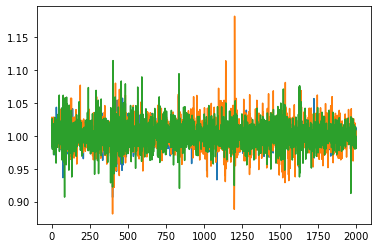

In [237]:
plt.plot(trainy)

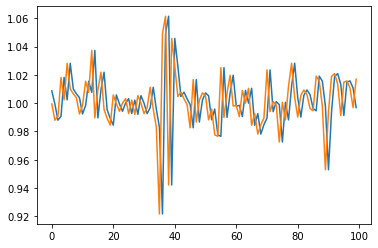

In [238]:
plt.plot(valX[:100, 2])
plt.plot(valy[:100, 2])

In [241]:
# reshape input to be 3D [samples, timesteps, features]
# seems like this is necessary?
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
valX = valX.reshape((valX.shape[0], 1, valX.shape[1]))

print(trainX.shape)
print(valX.shape)

(1999, 1, 15)
(800, 1, 15)


Epoch 1/100
63/63 [==============================] - 1s 12ms/step - loss: 1.0175 - val_loss: 0.7785
Epoch 2/100
63/63 [==============================] - 0s 7ms/step - loss: 0.4250 - val_loss: 0.3709
Epoch 3/100
63/63 [==============================] - 0s 7ms/step - loss: 0.1744 - val_loss: 0.2120
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0840 - val_loss: 0.1492
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0531 - val_loss: 0.1213
Epoch 6/100
63/63 [==============================] - 1s 13ms/step - loss: 0.0418 - val_loss: 0.1061
Epoch 7/100
63/63 [==============================] - 1s 15ms/step - loss: 0.0362 - val_loss: 0.0958
Epoch 8/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0322 - val_loss: 0.0876
Epoch 9/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0288 - val_loss: 0.0806
Epoch 10/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0745
Epoch 

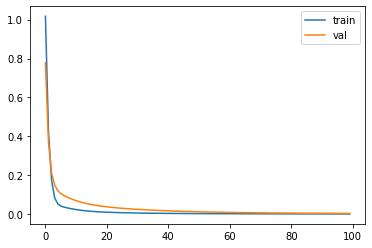

In [243]:
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(3))
model.compile(loss="mse", optimizer="adam") #mae vs mse

history = model.fit(trainX, trainy, epochs=100, batch_size=32, validation_data=(valX, valy), shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

(1999, 3)


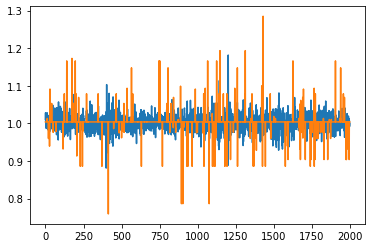

In [244]:
pred = model.predict(trainX)
print(pred.shape)
plt.plot(trainy[:, 1])
plt.plot(pred[:,1])

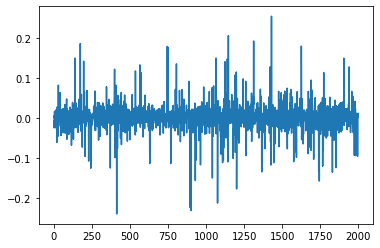

In [245]:
plt.plot(pred[:, 1]-trainy[:, 1])

(800, 3)


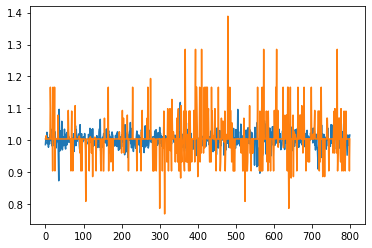

In [246]:
pred = model.predict(valX)
print(pred.shape)
plt.plot(valy[:, 1])
plt.plot(pred[:,1])

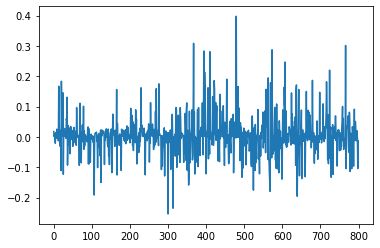

In [247]:
plt.plot(pred[:, 1]-valy[:, 1])